# Imports

In [1]:
import pandas as pd
import numpy as np
import inflection
import folium
from folium.plugins import MarkerCluster,MousePosition
import plotly.express as px
import plotly.graph_objects as go
from ydata_profiling import ProfileReport

/home/soturno/.pyenv/versions/3.10.4/envs/ftc/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Functions

In [2]:
COUNTRIES = {
1: "India",
14: "Australia",
30: "Brazil",
37: "Canada",
94: "Indonesia",
148: "New Zeland",
162: "Philippines",
166: "Qatar",
184: "Singapure",
189: "South Africa",
191: "Sri Lanka",
208: "Turkey",
214: "United Arab Emirates",
215: "England",
216: "United States of America"}

COLORS = {
"3F7E00": "darkgreen",
"5BA829": "green",
"9ACD32": "lightgreen",
"CDD614": "orange",
"FFBA00": "red",
"CBCBC8": "darkred",
"FF7800": "darkred"}

def rename_columns(dataframe):
    df = dataframe.copy()
    title = lambda x: inflection.titleize(x)
    snakecase = lambda x: inflection.underscore(x)
    spaces = lambda x: x.replace(" ", "")
    cols_old = list(df.columns)
    cols_old = list(map(title, cols_old))
    cols_old = list(map(spaces, cols_old))
    cols_new = list(map(snakecase, cols_old))
    df.columns = cols_new
    return df.columns

def country_name(country_id):
    return COUNTRIES[country_id]

def create_price_tye(price_range):
    if price_range == 1:
        return "cheap"
    elif price_range == 2:
        return "normal"
    elif price_range == 3:
        return "expensive"
    else:
        return "gourmet"

def color_name(color_code):
    return COLORS[color_code]

def dollarize (df):
    df['average_cost_for_two']=np.where(df['currency']=='Botswana Pula(P)',   df['average_cost_for_two'] * 0.074, df['average_cost_for_two'] )
    df['average_cost_for_two']=np.where(df['currency']=='Brazilian Real(R$)', df['average_cost_for_two'] * 0.21, df['average_cost_for_two'] )
    df['average_cost_for_two']=np.where(df['currency']=='Emirati Diram(AED)', df['average_cost_for_two'] * 0.27, df['average_cost_for_two'] )
    df['average_cost_for_two']=np.where(df['currency']=='Indian Rupees(Rs.)', df['average_cost_for_two'] * 0.012, df['average_cost_for_two'] )
    df['average_cost_for_two']=np.where(df['currency']=='Indonesian Rupiah(IDR)', df['average_cost_for_two'] * 0.000065, df['average_cost_for_two'] )
    df['average_cost_for_two']=np.where(df['currency']=='Pounds(£)', df['average_cost_for_two'] * 1.27, df['average_cost_for_two'] )
    df['average_cost_for_two']=np.where(df['currency']=='Qatari Rial(QR)', df['average_cost_for_two'] * 0.27, df['average_cost_for_two'] )
    df['average_cost_for_two']=np.where(df['currency']=='Rand(R)', df['average_cost_for_two'] * 0.054, df['average_cost_for_two'] )
    df['average_cost_for_two']=np.where(df['currency']=='Sri Lankan Rupee(LKR)', df['average_cost_for_two'] * 0.0031, df['average_cost_for_two'] )
    df['average_cost_for_two']=np.where(df['currency']=='Turkish Lira(TL)', df['average_cost_for_two'] * 0.034, df['average_cost_for_two'] )
    return df

def cuisines (df,col):
    df2=df['cuisines'].str.split(',',expand=True)
    df2= df2.replace(',','', regex=True)
    df2= df2.replace(' ','', regex=True)
    df2[col]=df[col]
    df2.fillna('empty', inplace=True)
    df2=df2.drop_duplicates(ignore_index=True)
    
    df2['Combined'] = df2[0].astype(str) +','+ df2[1] +','+df2[2]+','+df2[3]+','+df2[4]+','+df2[5]+','+df2[6]+','+df2[7] 
    
    df2= df2.replace(',empty','', regex=True)
    df2=df2[['Combined',col]]
    df2=df2.assign(var1=df2['Combined'].str.split(',')).explode('var1').rename(columns={'var1':'cuisines'})
    df2=df2.drop(columns=['Combined'])
    df2=df2.drop_duplicates(ignore_index=True)

    return df2

# Data

In [3]:
df_raw=pd.read_csv('../data/zomato_raw.csv')
df_raw.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6310675,Mama Lou's Italian Kitchen,162,Las Piñas City,"Block 1, Lot 36, Tropical Avenue Corner Tropic...",BF International,"BF International, Las Piñas City",121.009787,14.447615,Italian,...,Botswana Pula(P),1,0,0,0,3,4.6,3F7E00,Excellent,619


In [4]:
print(df_raw.shape,'\n')
print(df_raw.isna().sum(),'\n')
print(df_raw.dtypes)

(7527, 21) 

Restaurant ID            0
Restaurant Name          0
Country Code             0
City                     0
Address                  0
Locality                 0
Locality Verbose         0
Longitude                0
Latitude                 0
Cuisines                15
Average Cost for two     0
Currency                 0
Has Table booking        0
Has Online delivery      0
Is delivering now        0
Switch to order menu     0
Price range              0
Aggregate rating         0
Rating color             0
Rating text              0
Votes                    0
dtype: int64 

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking    

In [5]:
# profile = ProfileReport(df_raw, title="Profiling Report")
# profile.to_file('analysis.html')

In [6]:
# drop duplicated

# len(df[df.duplicated()])

df_raw=df_raw.drop_duplicates(keep='first')

In [7]:
# drop all 15 nas

df_raw=df_raw.dropna(ignore_index=True)

In [8]:
# fixing columns names

df_raw.columns=rename_columns(df_raw)
# df_raw.columns

In [9]:
# replacing country codes with their names

list=[]
for index, row in df_raw.iterrows():
    codes=country_name(row['country_code'])
    list.append(codes)

df_raw['country']=list
len(df_raw['country'].unique())

15

In [10]:
# replacing price range values with strings 

df_raw['price_range']=df_raw['price_range'].apply(create_price_tye)
df_raw['price_range'].unique()

array(['expensive', 'gourmet', 'normal', 'cheap'], dtype=object)

In [11]:
# replacing hex color codes with their color names

list=[]
for index, row in df_raw.iterrows():
    codes=color_name(row['rating_color'])
    list.append(codes)

df_raw['rating_color']=list
df_raw['rating_color'].unique()

array(['darkgreen', 'green', 'lightgreen', 'orange', 'red', 'darkred'],
      dtype=object)

In [12]:
# equalizing average_cost_for_two column

df_raw=dollarize(df_raw)

In [13]:
# drop column with only one variable

df_raw=df_raw.drop(columns=['switch_to_order_menu'])

In [14]:
# fixing mistype error

df_raw=df_raw.replace(25000017,25,inplace=False)

In [15]:
# fixing wrong restaurants coordinates

# df_raw[df_raw['restaurant_id']==95314]
df_raw.loc[3981,'latitude']=10.023286
df_raw.loc[3981,'longitude']=76.311371

# df_raw[df_raw['restaurant_id']==18445965]
df_raw.loc[6625,'latitude']=-25.7449
df_raw.loc[6625,'longitude']=28.1878

In [16]:
# creating another column to count the total of different cuisines by country

list=df_raw['cuisines'].str.split(',').apply(len)
df_raw['cuisines_n°']=list
df_raw[['cuisines','cuisines_n°']].head(5)

,cuisines,cuisines_n°
0,Italian,1
1,"European, Asian",2
2,"Filipino, American, Italian, Bakery",4
3,American,1
4,Filipino,1


In [17]:
df=df_raw.copy()

# Business questions

In [20]:
df['country'].unique()

array(['Philippines', 'Brazil', 'Australia', 'United States of America',
       'Canada', 'Singapure', 'United Arab Emirates', 'India',
       'Indonesia', 'New Zeland', 'England', 'Qatar', 'South Africa',
       'Sri Lanka', 'Turkey'], dtype=object)

## General information

In [53]:
# 1. Quantos restaurantes únicos estão registrados?

len(df['restaurant_id'].unique())

# n° unico

6929

In [54]:
# 2. Quantos países únicos estão registrados?

len(df['country'].unique())

# n° unico

15

In [55]:
# 3. Quantas cidades únicas estão registradas?

len(df['city'].unique())

# n° unico

125

In [56]:
# 4. Qual o total de avaliações feitas?

print(f'{df["votes"].sum():,.0f}')

# n° unico

4,638,535


In [27]:
# 5. Qual o total de tipos de culinária registrados?

list=df['cuisines'].str.split(',',expand=True)
list= list.replace(',','', regex=True)
list= list.replace(' ','', regex=True)

all=pd.DataFrame()
all['all']=pd.concat([list[0],list[1],list[2],list[3],list[4],list[5],list[6],list[7]])
all=all.dropna()
print(len(all['all'].unique()))

# n° unico

199


In [28]:
all['all'].value_counts().head(10)

all
NorthIndian    1567
Chinese        1226
Italian         905
FastFood        905
American        702
Continental     631
Cafe            612
Pizza           579
Desserts        490
Burger          474
Name: count, dtype: int64

In [21]:
# # mapa culinarias

# Criar o mapa
cuisine_map = folium.Map(control_scale=True)
marker_cluster = MarkerCluster().add_to(cuisine_map)

for i, row in df.iterrows():
    cuisines_count = row['cuisines_n°']

    if cuisines_count == 1:
        fill_color = 'red'
    elif 2 <= cuisines_count <= 3:
        fill_color = 'orange'
    elif 4 <= cuisines_count <= 6:
        fill_color = 'blue'
    elif cuisines_count == 7:
        fill_color = 'green'
    else:
        fill_color = 'gray'  # valores não mencionados

    popup_text = f'''<div style="font-size: 14px;">
                      Restaurant name: <b>{str(row["restaurant_name"])}</b><br>
                      Price range: <b>{str(row["price_range"])}</b><br>
                      Cuisines: <b>{str(row["cuisines"])}</b><br>
                      Avg cost for two ($): <b>{str(row["average_cost_for_two"])}</b><br>
                      Rating: <b>{str(row["aggregate_rating"])}</b>
                      </div>'''

    marker_size = int(row['cuisines_n°']) * 5

    tooltip_text = f'''<div style="font-size: 14px;">
                      Restaurant name: <b>{str(row["restaurant_name"])}</b><br>
                      Price range: <b>{str(row["price_range"])}</b><br>
                      Cuisines: <b>{str(row["cuisines"])}</b><br>
                      Avg cost for two ($): <b>{str(row["average_cost_for_two"])}</b><br>
                      Rating: <b>{str(row["aggregate_rating"])}</b>
                      </div>'''

    folium.CircleMarker([row['latitude'], row['longitude']],
                        radius=marker_size,
                        tooltip=tooltip_text,
                        color='black',  # Cor da borda
                        fill=True,
                        fill_color=fill_color,
                        fill_opacity=0.8).add_to(marker_cluster)

legend_html = '''
    <div style="position: fixed; 
                bottom: 50px; left: 50px; width: 150px; height: 150px; 
                border:2px solid grey; z-index:9999; font-size:14px;
                background-color:white; opacity: .85; text-align: left; padding: 5px;">
      <b style="font-size: 16px;">Cuisines variety:</b><br>
      <span style="color: red; font-size: 20px; vertical-align: middle;">■</span> 1 Cuisine <br>
      <span style="color: orange; font-size: 20px; vertical-align: middle;">■</span> 2-3 Cuisines <br>
      <span style="color: blue; font-size: 20px; vertical-align: middle;">■</span> 4-6 Cuisines <br>
      <span style="color: green; font-size: 20px; vertical-align: middle;">■</span> 7 Cuisines <br>
    </div>
    '''

cuisine_map.get_root().html.add_child(folium.Element(legend_html))

cuisine_map

In [22]:
# # mapa preço

price_map = folium.Map(control_scale=True)
marker_cluster = MarkerCluster().add_to(price_map)

price_color = {'gourmet': 'red', 'expensive': 'orange', 'normal': 'blue', 'cheap': 'green'}
price_size = {'gourmet': 25, 'expensive': 20, 'normal': 15, 'cheap': 10}

for i, row in df.iterrows():
    popup_text = f'''<div style="font-size: 14px;">
                      Restaurant name: <b>{str(row["restaurant_name"])}</b><br>
                      Price range: <b>{str(row["price_range"])}</b><br>
                      Cuisines: <b>{str(row["cuisines"])}</b><br>
                      Avg cost for two ($): <b>{str(row["average_cost_for_two"])}</b><br>
                      Rating: <b>{str(row["aggregate_rating"])}</b>
                      </div>'''

    marker_size = price_size.get(row['price_range'], 8)  # Tamanho padrão é 8 se não estiver nas faixas especificadas
    fill_color = price_color.get(row['price_range'], 'gray')

    # Substituir cor cinza por laranja
    if fill_color == 'gray' and row['price_range'] == 'expensive':
        fill_color = 'orange'

    tooltip_text = f'''<div style="font-size: 14px;">
                      Restaurant name: <b>{str(row["restaurant_name"])}</b><br>
                      Price range: <b>{str(row["price_range"])}</b><br>
                      Cuisines: <b>{str(row["cuisines"])}</b><br>
                      Avg cost for two ($): <b>{str(row["average_cost_for_two"])}</b><br>
                      Rating: <b>{str(row["aggregate_rating"])}</b>
                      </div>'''

    folium.CircleMarker([row['latitude'], row['longitude']],
                        radius=marker_size,
                        tooltip=tooltip_text,
                        color='black',  # Cor da borda
                        fill=True,
                        fill_color=fill_color,
                        fill_opacity=0.8).add_to(marker_cluster)

# Adapte o tamanho da legenda conforme necessário
legend_html = '''
    <div style="position: fixed; 
                bottom: 50px; left: 50px; width: 150px; height: 150px; 
                border:2px solid grey; z-index:9999; font-size:14px;
                background-color:white; opacity: .85; text-align: left; padding: 5px;">
      <b style="font-size: 16px;">Price range:</b><br>
      <span style="color: red; font-size: 20px; vertical-align: middle;">■</span> Gourmet <br>
      <span style="color: orange; font-size: 20px; vertical-align: middle;">■</span> Expensive <br>
      <span style="color: blue; font-size: 20px; vertical-align: middle;">■</span> Normal <br>
      <span style="color: green; font-size: 20px; vertical-align: middle;">■</span> Cheap<br>
    </div>
    '''

price_map.get_root().html.add_child(folium.Element(legend_html))

# price_map

In [24]:
# mapa aggregate rating
agg_map = folium.Map(control_scale=True)
marker_cluster = MarkerCluster().add_to(agg_map)

rating_size = {'bad': 10, 'regular': 15, 'good': 20, 'excellent': 25}

for i, row in df.iterrows():
    rating = row['aggregate_rating']

    if rating == 0:
        fill_color = 'gray'
        rating_category = 'bad'  # Pode ser qualquer categoria, pois o tamanho será o mesmo dos vermelhos
    elif 2.1 <= rating <= 3.5:
        fill_color = 'red'  # Bad
        rating_category = 'bad'
    elif 3.6 <= rating <= 4.0:
        fill_color = 'orange'  # Regular
        rating_category = 'regular'
    elif 4.1 <= rating <= 4.5:
        fill_color = 'blue'  # Good
        rating_category = 'good'
    else:
        fill_color = 'green'  # Excellent
        rating_category = 'excellent'

    popup_text = f'''<div style="font-size: 14px;">
                      Restaurant name: <b>{str(row["restaurant_name"])}</b><br>
                      Price range: <b>{str(row["price_range"])}</b><br>
                      Cuisines: <b>{str(row["cuisines"])}</b><br>
                      Avg cost for two ($): <b>{str(row["average_cost_for_two"])}</b><br>
                      Rating: <b>{str(row["aggregate_rating"])}</b>
                      </div>'''

    marker_size = rating_size.get(rating_category, 10)  # Tamanho padrão é 10 se não estiver nas faixas especificadas

    tooltip_text = f'''<div style="font-size: 14px;">
                      Restaurant name: <b>{str(row["restaurant_name"])}</b><br>
                      Price range: <b>{str(row["price_range"])}</b><br>
                      Cuisines: <b>{str(row["cuisines"])}</b><br>
                      Avg cost for two ($): <b>{str(row["average_cost_for_two"])}</b><br>
                      Rating: <b>{str(row["aggregate_rating"])}</b>
                      </div>'''

    folium.CircleMarker([row['latitude'], row['longitude']],
                        radius=marker_size,
                        tooltip=tooltip_text,
                        color='black',  # Cor da borda
                        fill=True,
                        fill_color=fill_color,
                        fill_opacity=0.8).add_to(marker_cluster)

# Adapte o tamanho da legenda conforme necessário
legend_html = '''
    <div style="position: fixed; 
                bottom: 50px; left: 50px; width: 150px; height: 195px; 
                border:2px solid grey; z-index:9999; font-size:14px;
                background-color:white; opacity: .85; text-align: left; padding: 5px;">
      <b style="font-size: 16px;">Aggregate Rating:</b><br>
      <span style="color: gray; font-size: 20px; vertical-align: middle;">■</span> Not Rated (0)<br>
      <span style="color: red; font-size: 20px; vertical-align: middle;">■</span> Bad (2.1 - 3.5) <br>
      <span style="color: orange; font-size: 20px; vertical-align: middle;">■</span> Regular (3.6 - 4.0) <br>
      <span style="color: blue; font-size: 20px; vertical-align: middle;">■</span> Good (4.1 - 4.5) <br>
      <span style="color: green; font-size: 20px; vertical-align: middle;">■</span> Excellent (>4.5)<br>
    </div>
    '''

agg_map.get_root().html.add_child(folium.Element(legend_html))

agg_map

In [26]:
# # mapa average cost for two

avg_map = folium.Map(control_scale=True)
marker_cluster = MarkerCluster().add_to(avg_map)

cost_size = {'cheap': 10, 'normal': 15, 'expensive': 20, 'gourmet': 25}

for i, row in df.iterrows():
    avg_cost = row['average_cost_for_two']

    if 0 <= avg_cost <= 20:
        fill_color = 'green'  # Cheap
        cost_category = 'cheap'
    elif 21 <= avg_cost <= 50:
        fill_color = 'blue'  # Normal
        cost_category = 'normal'
    elif 51 <= avg_cost <= 100:
        fill_color = 'orange'  # Expensive
        cost_category = 'expensive'
    else:
        fill_color = 'red'  # Gourmet
        cost_category = 'gourmet'

    popup_text = f'''<div style="font-size: 14px;">
                      Restaurant name: <b>{str(row["restaurant_name"])}</b><br>
                      Price range: <b>{str(row["price_range"])}</b><br>
                      Cuisines: <b>{str(row["cuisines"])}</b><br>
                      Avg cost for two ($): <b>{str(row["average_cost_for_two"])}</b><br>
                      Rating: <b>{str(row["aggregate_rating"])}</b>
                      </div>'''

    marker_size = cost_size.get(cost_category, 10)  # Tamanho padrão é 10 se não estiver nas faixas especificadas

    tooltip_text = f'''<div style="font-size: 14px;">
                      Restaurant name: <b>{str(row["restaurant_name"])}</b><br>
                      Price range: <b>{str(row["price_range"])}</b><br>
                      Cuisines: <b>{str(row["cuisines"])}</b><br>
                      Avg cost for two ($): <b>{str(row["average_cost_for_two"])}</b><br>
                      Rating: <b>{str(row["aggregate_rating"])}</b>
                      </div>'''

    folium.CircleMarker([row['latitude'], row['longitude']],
                        radius=marker_size,
                        tooltip=tooltip_text,
                        color='black',  # Cor da borda
                        fill=True,
                        fill_color=fill_color,
                        fill_opacity=0.8).add_to(marker_cluster)

legend_html = '''
    <div style="position: fixed; 
                bottom: 50px; left: 50px; width: 150px; height: 195px; 
                border:2px solid grey; z-index:9999; font-size:14px;
                background-color:white; opacity: .85; text-align: left; padding: 5px;">
      <b style="font-size: 16px;">Average Cost for Two ($):</b><br>
      <span style="color: green; font-size: 20px; vertical-align: middle;">■</span> Cheap (0 - 20) <br>
      <span style="color: blue; font-size: 20px; vertical-align: middle;">■</span> Normal (21 - 50) <br>
      <span style="color: orange; font-size: 20px; vertical-align: middle;">■</span> Expensive (51 - 100) <br>
      <span style="color: red; font-size: 20px; vertical-align: middle;">■</span> Gourmet (>100)<br>
    </div>
    '''

avg_map.get_root().html.add_child(folium.Element(legend_html))

avg_map

# Country

In [47]:
# total cuisines by country

# df_aux = df.loc[:, ['country', 'cuisines_n°']].groupby('country').count().sort_values('cuisines_n°',ascending=False).reset_index()

# px.bar(df_aux, x='country', y='cuisines_n°')

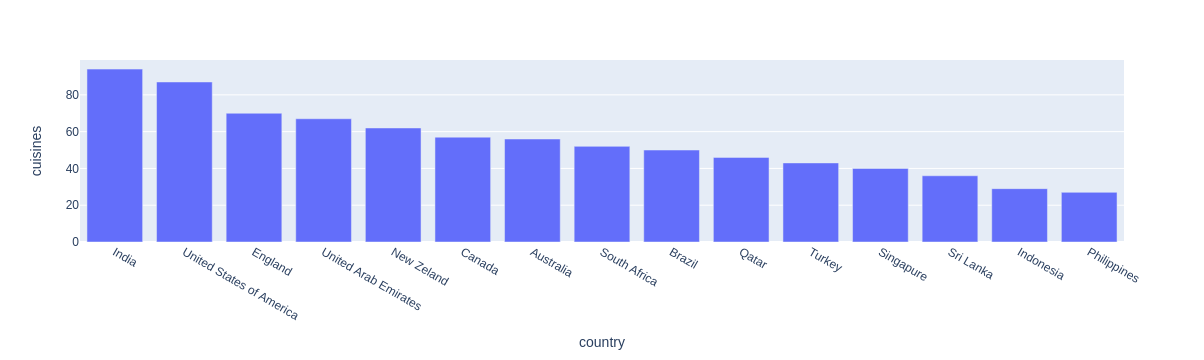

In [37]:
# unique cuisines by country

df2=cuisines(df,'country')

df_aux = df2.loc[:, ['country', 'cuisines']].groupby('country').count().sort_values('cuisines',ascending=False).reset_index()

px.bar(df_aux, x='country', y='cuisines')

In [38]:
df_aux

,country,cuisines
0,India,94
1,United States of America,87
2,England,70
3,United Arab Emirates,67
4,New Zeland,62
5,Canada,57
6,Australia,56
7,South Africa,52
8,Brazil,50
9,Qatar,46


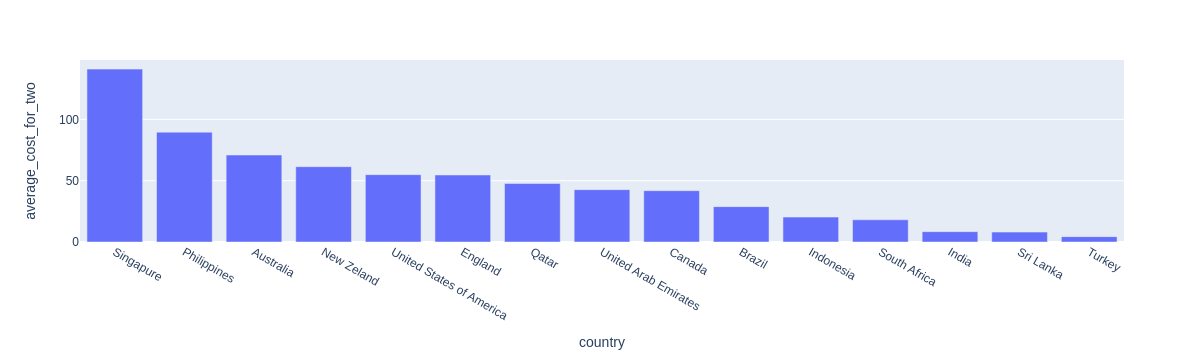

In [44]:
# average cost for two by country

df_aux = df.loc[:, ['country', 'average_cost_for_two']].groupby('country').mean().sort_values('average_cost_for_two',ascending=False).reset_index()

px.bar(df_aux, x='country', y='average_cost_for_two')

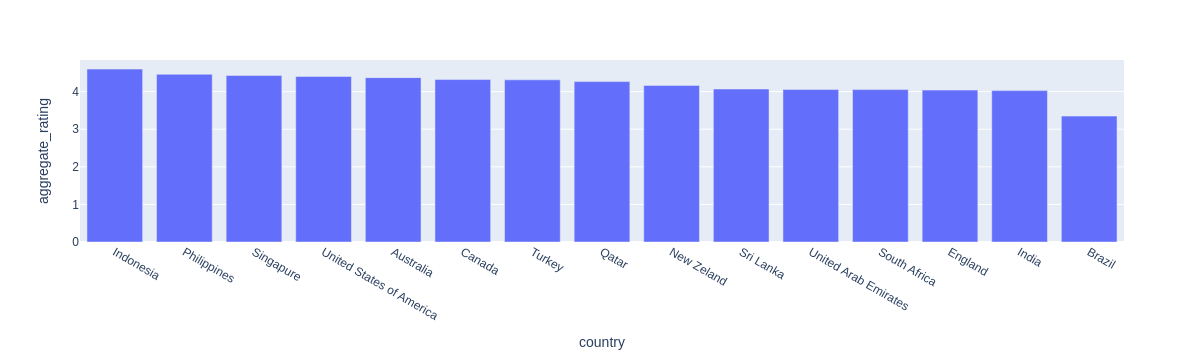

In [45]:
# aggregate rating by country

df_aux = df.loc[:, ['country', 'aggregate_rating']].groupby('country').mean().sort_values('aggregate_rating',ascending=False).reset_index()

px.bar(df_aux, x='country', y='aggregate_rating')

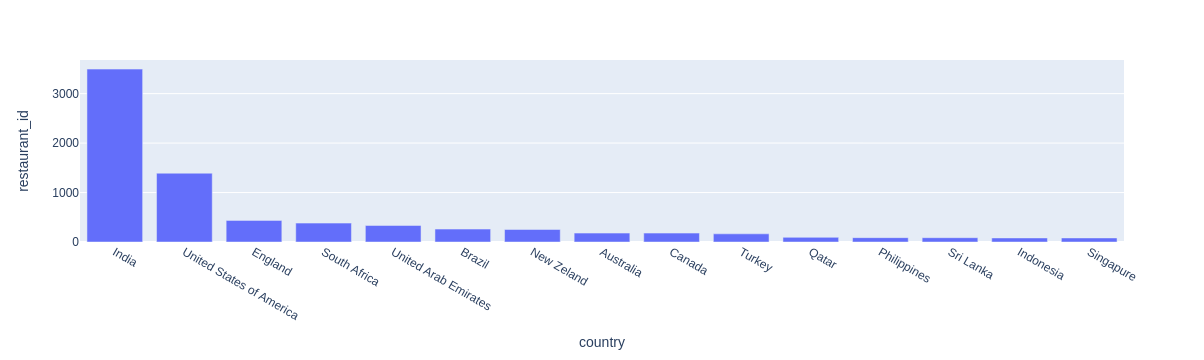

In [50]:
# n° of restaurants by country

df_aux = df.loc[:, ['country', 'restaurant_id']].groupby('country').count().sort_values('restaurant_id',ascending=False).reset_index()

px.bar(df_aux, x='country', y='restaurant_id')

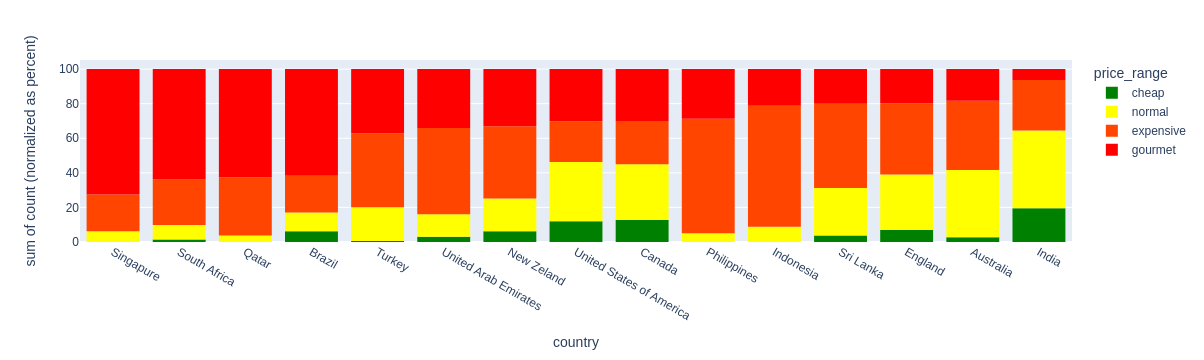

In [36]:
# price range by country

df_aux = df.loc[:, ['country', 'price_range']].groupby('country').value_counts().sort_values(ascending=False).reset_index()
df_aux['percentage'] = df_aux.groupby('country')['count'].transform(lambda x: x / x.sum() * 100)
df_aux = df_aux.sort_values(by=['percentage'], ascending=False)

ordered_countries = df_aux[df_aux['price_range'] == 'gourmet']['country'].tolist()
category_order = ['cheap', 'normal', 'expensive', 'gourmet']
color_mapping = {'cheap': 'green', 'normal': 'yellow', 'expensive': 'orangered', 'gourmet': 'red'}

fig=px.histogram(df_aux, x='country', y='count', hover_data='price_range', color="price_range",
                                             barnorm='percent',
                                             category_orders={'price_range': category_order},
                                             color_discrete_map=color_mapping)
fig.update_xaxes(categoryorder='array', categoryarray=ordered_countries)

# df_aux

In [17]:
# 1. Qual o nome do país que possui mais cidades registradas?

df[['country','city']].groupby('country').count().sort_values('city',ascending=False).reset_index().head(1)

# n° unico

,country,city
0,India,3496


In [18]:
# 2. Qual o nome do país que possui mais restaurantes registrados?

df[['country','restaurant_id']].groupby('country').count().sort_values('restaurant_id',ascending=False).reset_index().head(1)

# n° unico

,country,restaurant_id
0,India,3496


In [19]:
# 3. Qual o nome do país que possui mais restaurantes com o nível de preço igual a 4 registrados?

df1=df[df['price_range']=='gourmet']
df1['country'].value_counts().head(1)

# n° unico

country
United States of America    418
Name: count, dtype: int64

In [20]:
# 4. Qual o nome do país que possui a maior quantidade de tipos de culinária distintos?

list=df['cuisines'].str.split(',',expand=True)
list= list.replace(',','', regex=True)
list= list.replace(' ','', regex=True)
list['country']=df['country']
list.fillna('empty', inplace=True)
list=list.drop_duplicates(ignore_index=True)

list['Combined'] = list[0].astype(str) +','+ list[1] +','+list[2]+','+list[3]+','+list[4]+','+list[5]+','+list[6]+','+list[7] 

list= list.replace(',empty','', regex=True)
list=list[['Combined','country']]
list=list.assign(var1=list['Combined'].str.split(',')).explode('var1')
list=list.drop(columns=['Combined'])
list=list.drop_duplicates(ignore_index=True)
list['country'].value_counts().head(1)

# n° unico

country
India    94
Name: count, dtype: int64

In [21]:
# 5. Qual o nome do país que possui a maior quantidade de avaliações feitas?

df[['country','votes']].groupby('country').sum().sort_values('votes',ascending=False).reset_index().head(1)

# n° unico

,country,votes
0,India,3175051


In [22]:
# 6. Qual o nome do país que possui a maior quantidade de restaurantes que fazem entrega?

df1=df[df['is_delivering_now']==1]
df1['country'].value_counts().head(1)

# n° unico

country
India    1247
Name: count, dtype: int64

In [23]:
# 7. Qual o nome do país que possui a maior quantidade de restaurantes que aceitam reservas?

df1=df[df['has_table_booking']==1]
df1['country'].value_counts().head(1)

# n° unico

country
India    291
Name: count, dtype: int64

In [24]:
# 8. Qual o nome do país que possui, na média, a maior quantidade de avaliações registradas?

df[['country','votes']].groupby('country').mean().sort_values('votes',ascending=False).reset_index().head(1)

# n° unico

,country,votes
0,Indonesia,1115.317073


In [25]:
# 9. Qual o nome do país que possui, na média, a maior nota média registrada?

df1=df[df['votes']>3]

df1[['country','aggregate_rating']].groupby('country').mean().sort_values('aggregate_rating',ascending=False).reset_index().head(1)

# n° unico

,country,aggregate_rating
0,Indonesia,4.6


In [26]:
# 10. Qual o nome do país que possui, na média, a menor nota média registrada?

df1=df[df['votes']>3]

df1[['country','aggregate_rating']].groupby('country').mean().sort_values('aggregate_rating',ascending=True).reset_index().head(1)

# n° unico

,country,aggregate_rating
0,Brazil,4.032524


In [17]:
# columns = ['country', 'restaurant_name', 'price_range', 'cuisines', 'aggregate_rating', 'average_cost_for_two', 'latitude', 'longitude', 'cuisines_n°']
# columns_groupby = ['country', 'restaurant_name', 'price_range', 'cuisines', 'aggregate_rating', 'average_cost_for_two', 'cuisines_n°']
# plot = df.loc[:, columns].groupby(columns_groupby).mean().reset_index()

# Cidade

In [46]:
# 1. Qual o nome da cidade que possui mais restaurantes diferentes registrados?

df1=df.drop_duplicates(subset=['restaurant_name'])
df1=(df1[['city','country','restaurant_name']].groupby(['city','country'])
                                             .count()
                                             .sort_values('restaurant_name',ascending=False)
                                             .rename(columns={'restaurant_name':'restaurants'})
                                             .reset_index()
                                             .head(12))

df1['count']=df1['restaurants']
df1
# df1=df[df['city']=='Abu Dhabi']
# len(df1['restaurant_name'].unique())
# n° unico

,city,country,restaurants,count
0,Singapore,Singapure,80,80
1,São Paulo,Brazil,78,78
2,Hamilton,New Zeland,77,77
3,Auckland,New Zeland,77,77
4,Brasília,Brazil,77,77
5,Edinburgh,England,76,76
6,Rio de Janeiro,Brazil,74,74
7,Birmingham,England,73,73
8,Durban,South Africa,73,73
9,Colombo,Sri Lanka,73,73


In [27]:
# 2. Qual o nome da cidade que possui mais restaurantes com nota média acima de 4.5?

df1=df[df['aggregate_rating']>4.5]
df1[['city','country','restaurant_id']].groupby(['city','country']).count().sort_values('restaurant_id',ascending=False).reset_index().head(10)

# n° unico

,city,country,restaurant_id
0,London,England,55
1,Jakarta,Indonesia,49
2,Singapore,Singapure,43
3,Houston,United States of America,38
4,Bangalore,India,36
5,New York City,United States of America,34
6,Chennai,India,32
7,Pune,India,30
8,Chicago,United States of America,29
9,Atlanta,United States of America,29


In [48]:
df1=df[df['aggregate_rating']>4.5]
df2 = df[['city', 'country', 'restaurant_id']].groupby(['city', 'country']).count().reset_index()  # total de restaurantes por cidade

df_merged = pd.merge(df2, df1[['city', 'country', 'restaurant_id']]
                    .groupby(['city', 'country'])
                     .count()
                     .reset_index(), on=['city', 'country'], how='left', suffixes=('_total', '_rating_above_4_5'))

# cidades sem restaurantes com nota abaixo de 4 
df_merged['restaurant_id_rating_above_4_5'] = df_merged['restaurant_id_rating_above_4_5'].fillna(0).astype(int)  

df_merged['proportion_rating_above_4_5'] = df_merged['restaurant_id_rating_above_4_5'] / df_merged['restaurant_id_total']

df1 = (df_merged.sort_values('restaurant_id_rating_above_4_5', ascending=False)
                .rename(columns={'restaurant_id_total':'restaurants',
                                 'restaurant_id_rating_above_4_5':'rating_above_4_5',
                                 'proportion_rating_above_4_5':'proportion'})
                .reset_index())
                # [['city', 'country', 'proportion', 'restaurants', 'rating_above_4_5']])

df1['proportion'] = (df1['proportion'] * 100).round(2)
df1=df1[(df1['rating_above_4_5']>0) & (df1['restaurants']>10)]
df1=df1[['city', 'country', 'proportion']]

df1['below 4.5']=(df1['proportion']-100) *-1
df1=df1.rename(columns={'proportion':'above 4.5'}).sort_values('above 4.5',ascending=False)
df1.loc[8,'above 4.5']=45.01
df1.loc[8,'below 4.5']=54.99
df1.head(10)

,city,country,above 4.5,below 4.5
0,London,England,66.25,33.75
1,Jakarta,Indonesia,63.16,36.84
3,New York City,United States of America,56.67,43.33
2,Singapore,Singapure,52.50,47.50
6,Chicago,United States of America,48.33,51.67
7,Atlanta,United States of America,48.33,51.67
8,Detroit,United States of America,45.01,54.99
75,Gurgaon,India,41.67,58.33
4,Bangalore,India,41.25,58.75
61,Makati City,Philippines,41.18,58.82


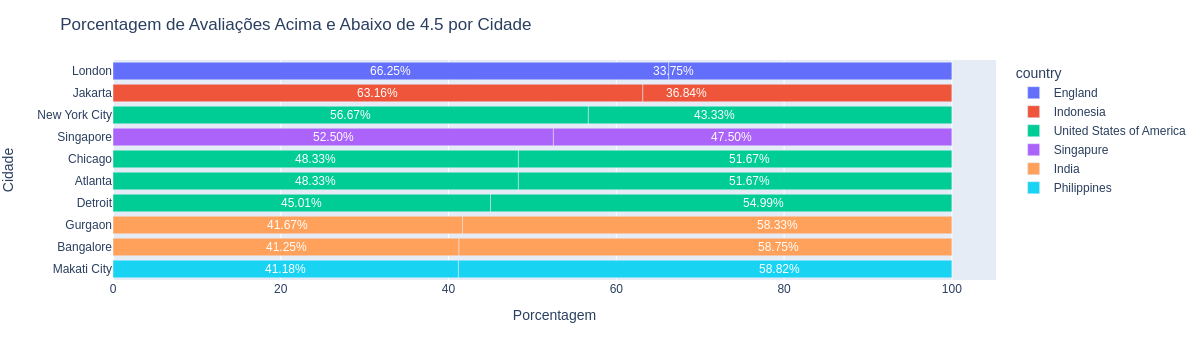

In [65]:
# Criando o gráfico de barras com Plotly Graph Objects
fig = go.Figure()

 # Criando o gráfico de barras
fig = px.bar(df1, x=["above 4.5", "below 4.5"], y="city", color='country',
             category_orders={'city': df1['city'].tolist()},
             labels={'above 4.5': 'Above 4.5%', 'below 4.5': 'Below 4.5%'})

# Ajustando o layout
fig.update_layout(title='Porcentagem de Avaliações Acima e Abaixo de 4.5 por Cidade',
                  xaxis_title='Porcentagem',
                  yaxis_title='Cidade')

# Adicionando textos customizados diretamente nas barras
for i, row in df1.iterrows():
    fig.add_annotation(x=row['above 4.5'] / 2, y=row['city'],
                       text=f'{row["above 4.5"]:.2f}%',
                       showarrow=False, font=dict(color='white'))

    fig.add_annotation(x=50 + row['below 4.5'] / 2, y=row['city'],
                       text=f'{row["below 4.5"]:.2f}%',
                       showarrow=False, font=dict(color='white'))

# Mostrando o gráfico
fig.show()


In [69]:
# 3. Qual o nome da cidade que possui mais restaurantes com nota média abaixo de 2.5?

# df1=df[(df['aggregate_rating']<4.0) & (df['votes']>3)]

# df1[['city','country','restaurant_id']].groupby(['city','country']).count().sort_values('restaurant_id',ascending=False).reset_index().head(10)

# n° unico

In [42]:
df1 = df[(df['aggregate_rating']<4.0) & (df['votes']>3)]
df2 = df[['city', 'country', 'restaurant_id']].groupby(['city', 'country']).count().reset_index()  # total de restaurantes por cidade

df_merged = pd.merge(df2, df1[['city', 'country', 'restaurant_id']]
                    .groupby(['city', 'country'])
                     .count()
                     .reset_index(), on=['city', 'country'], how='left', suffixes=('_total', '_rating_below_4'))

# cidades sem restaurantes com nota abaixo de 4 
df_merged['restaurant_id_rating_below_4'] = df_merged['restaurant_id_rating_below_4'].fillna(0).astype(int)  

df_merged['proportion_rating_below_4'] = df_merged['restaurant_id_rating_below_4'] / df_merged['restaurant_id_total']

df1 = (df_merged.sort_values('proportion_rating_below_4', ascending=False)
                .rename(columns={'restaurant_id_total':'restaurants',
                                 'restaurant_id_rating_below_4':'rating_below_4',
                                 'proportion_rating_below_4':'proportion'})
                .reset_index())

df1['proportion'] = (df1['proportion'] * 100).round(2)
df1=df1[df1['restaurants']>10]
df1=df1[['city', 'country','proportion']]

df1['above 4.5']=(df1['proportion']-100) *-1
df1=df1.rename(columns={'proportion':'below 4.5'}).sort_values('below 4.5',ascending=False)
df1.head(10)

,city,country,below 4.5,above 4.5
0,Fujairah,United Arab Emirates,100.00,-0.00
1,Shimla,India,92.41,7.59
2,Clarens,South Africa,84.62,15.38
3,Ooty,India,76.25,23.75
4,Brasília,Brazil,70.00,30.00
5,Hamilton,New Zeland,56.25,43.75
6,Glasgow,England,56.25,43.75
7,Gangtok,India,54.17,45.83
9,Allahabad,India,43.75,56.25
10,Puducherry,India,42.50,57.50


In [72]:
# 4. Qual o nome da cidade que possui o maior valor médio de um prato para dois?

df[['city','country','restaurant_name','average_cost_for_two']].sort_values('average_cost_for_two',ascending=False).head(10)
# (df[['city','country','average_cost_for_two']].groupby(['city','country']).count().reset_index()
#                                                       .sort_values('average_cost_for_two',ascending=False).head(10))
# n° unico

,city,country,restaurant_name,average_cost_for_two
2069,Singapore,Singapure,Corner House,755.0
1418,New York City,United States of America,Eleven Madison Park,650.0
766,Chicago,United States of America,Alinea,600.0
1400,New York City,United States of America,Per Se,600.0
2000,Singapore,Singapure,Raffles Grill,500.0
1414,New York City,United States of America,Le Bernardin,500.0
2010,Singapore,Singapure,Restaurant Andre,500.0
2014,Singapore,Singapure,Odette,490.0
33,Pasay City,Philippines,Spiral - Sofitel Philippine Plaza Manila,444.0
1888,San Francisco,United States of America,Quince,440.0


In [62]:
# 5. Qual o nome da cidade que possui a maior quantidade de tipos de culinária distintas?

list=df['cuisines'].str.split(',',expand=True)
list= list.replace(',','', regex=True)
list= list.replace(' ','', regex=True)
list[['city','country']]=df[['city','country']]
list.fillna('empty', inplace=True)
list=list.drop_duplicates(ignore_index=True)

list['Combined'] = list[0].astype(str) +','+ list[1] +','+list[2]+','+list[3]+','+list[4]+','+list[5]+','+list[6]+','+list[7] 

list= list.replace(',empty','', regex=True)
list=list[['Combined','city','country']]
list=list.assign(var1=list['Combined'].str.split(',')).explode('var1')
list=list.drop(columns=['Combined'])
list=list.drop_duplicates(ignore_index=True)
list[['city','country','var1']].groupby(['city','country']).count().sort_values('var1',ascending=False).reset_index().head(10)
# list=cuisines(df,'city')
# list

,city,country,var1
0,Dubai,United Arab Emirates,53
1,Chennai,India,46
2,London,England,46
3,Mumbai,India,46
4,Doha,Qatar,46
5,Abu Dhabi,United Arab Emirates,45
6,Montreal,Canada,45
7,Auckland,New Zeland,45
8,Puducherry,India,44
9,Calgary,Canada,44


In [64]:
# 6. Qual o nome da cidade que possui a maior quantidade de restaurantes que fazem reservas?

df1=df[df['has_table_booking']==1]
df1['city'].value_counts().head(10)

city     
Bangalore    47
Chennai      35
Pune         31
Mumbai       23
New Delhi    17
Auckland     17
Brisbane     17
London       15
Hyderabad    15
Edinburgh    13
Name: count, dtype: int64

In [65]:
# 7. Qual o nome da cidade que possui a maior quantidade de restaurantes que fazem entregas?

df1=df[df['is_delivering_now']==1]
df1['city'].value_counts().head(10)

city
Aurangabad    53
Vadodara      52
Bhopal        50
Ludhiana      50
Jaipur        49
Amritsar      48
Dehradun      48
Ahmedabad     47
Ranchi        43
Varanasi      43
Name: count, dtype: int64

In [66]:
# 8. Qual o nome da cidade que possui a maior quantidade de restaurantes que aceitam pedidos online?

df1=df[df['has_online_delivery']==1]
df1['city'].value_counts().head(10)

city
Abu Dhabi     86
Bhopal        81
Nagpur        80
Sharjah       80
Vadodara      79
Aurangabad    76
Patna         74
Allahabad     74
Kolkata       73
Surat         73
Name: count, dtype: int64

# Restaurantes

In [68]:
# 1. Qual o nome do restaurante que possui a maior quantidade de avaliações?

df[['restaurant_name','country','votes']].groupby(['restaurant_name','country']).sum().sort_values('votes',ascending=False).reset_index().head(10)

,restaurant_name,country,votes
0,Domino's Pizza,India,119498
1,AB's - Absolute Barbecues,India,117750
2,Chili's Grill & Bar,India,55378
3,Barbeque Nation,India,51538
4,Bawarchi,India,41711
5,Paradise,India,36996
6,Joey's Pizza,India,32026
7,KFC,India,29227
8,Chili's American Grill & Bar,India,28808
9,Empire Restaurant,India,24560


In [19]:
# 2. Qual o nome do restaurante com a maior nota média?

df1=df[df['votes']>3]

df1[['restaurant_name','country','aggregate_rating']].sort_values('aggregate_rating',ascending=False).head(10)

,restaurant_name,country,aggregate_rating
782,Smoque BBQ,United States of America,4.9
830,Sweet Georgia Brown,United States of America,4.9
3158,Bhangra,India,4.9
5810,Ombra,New Zeland,4.9
674,Village Ice Cream,Canada,4.9
649,The Himalayan,Canada,4.9
1964,Paseo,United States of America,4.9
1970,The Harvest Vine,United States of America,4.9
5928,The Delhi,England,4.9
632,Jacaranda Coffee Lane,Australia,4.9


In [51]:
df.columns

Index(['restaurant_id', 'restaurant_name', 'country_code', 'city', 'address',
       'locality', 'locality_verbose', 'longitude', 'latitude', 'cuisines',
       'average_cost_for_two', 'currency', 'has_table_booking',
       'has_online_delivery', 'is_delivering_now', 'price_range',
       'aggregate_rating', 'rating_color', 'rating_text', 'votes', 'country',
       'cuisines_n°'],
      dtype='object')

In [74]:
df1=df[df['votes']>3]

df1[['restaurant_name','country','aggregate_rating']].sort_values('aggregate_rating',ascending=True).head(10)

,restaurant_name,country,aggregate_rating
7351,Marco Pascha,Turkey,2.1
7019,Moyo,South Africa,2.2
7189,Guy Fieri's Kitchen & Bar,South Africa,2.2
7190,Guy Fieri's Kitchen & Bar,South Africa,2.2
1583,Siena's,Australia,2.3
5357,Madame Shanthe's,India,2.3
7263,Bliss lounge,Sri Lanka,2.3
5358,Madame Shanthe's,India,2.3
6216,Metropolis Caffe,New Zeland,2.3
4988,The Biryani Kitchen,India,2.3


In [21]:
# 3. Qual o nome do restaurante que possui o maior valor de uma prato para duas pessoas?

df[['restaurant_name','city','country','average_cost_for_two']].sort_values('average_cost_for_two',ascending=False).head(10)

,restaurant_name,city,country,average_cost_for_two
2069,Corner House,Singapore,Singapure,755.0
1418,Eleven Madison Park,New York City,United States of America,650.0
766,Alinea,Chicago,United States of America,600.0
1400,Per Se,New York City,United States of America,600.0
2000,Raffles Grill,Singapore,Singapure,500.0
1414,Le Bernardin,New York City,United States of America,500.0
2010,Restaurant Andre,Singapore,Singapure,500.0
2014,Odette,Singapore,Singapure,490.0
33,Spiral - Sofitel Philippine Plaza Manila,Pasay City,Philippines,444.0
1888,Quince,San Francisco,United States of America,440.0


In [73]:
# 4. Qual o nome do restaurante de tipo de culinária brasileira que possui a menor média de avaliação?

df1=df[(df['cuisines']=='Brazilian') & (df['votes']>3)] 
df1[['restaurant_name','aggregate_rating']].sort_values('aggregate_rating',ascending=True).head(10)

,restaurant_name,aggregate_rating
259,Café das Estrelas,3.0
258,Café das Estrelas,3.0
91,Confraria Chico Mineiro,3.3
146,Liv Lounge,3.3
102,Maori,3.6
6551,Viva Brazil,3.6
247,Leme Light,4.1
196,Monchique,4.2
1040,Gaucho Steakhouse,4.2
6721,Bem Brasil,4.3


In [40]:
# 5. Qual o nome do restaurante de tipo de culinária brasileira, e que é do Brasil, que possui a maior média de avaliação?

df1=df[(df['cuisines']=='Brazilian') & (df['country']=='Brazil')] 
df1[['restaurant_name','aggregate_rating']].sort_values('aggregate_rating',ascending=False).head(1)

,restaurant_name,aggregate_rating
254,Aprazível,4.9


In [41]:
# 6. Os restaurantes que aceitam pedido online são também, na média, os restaurantes que mais possuem avaliações registradas?

df[['has_online_delivery','votes']].groupby('has_online_delivery').mean().reset_index()

,has_online_delivery,votes
0,0,494.336901
1,1,843.027516


In [42]:
# 7. Os restaurantes que fazem reservas são também, na média, os restaurantes que possuem o maior valor médio de um prato para duas pessoas?

df[['has_table_booking','average_cost_for_two']].groupby('has_table_booking').mean().reset_index()

,has_table_booking,average_cost_for_two
0,0,29.036726
1,1,36.012051


In [43]:
# 8. Os restaurantes do tipo de culinária japonesa dos Estados Unidos da América possuem um valor médio de prato para duas pessoas maior que
# as churrascarias americanas (BBQ)?

df1=df[(df['cuisines']=='Japanese') & (df['country']=='United States of America')]
df2=df[df['cuisines']=='BBQ']

print(df1['average_cost_for_two'].mean())
print(df2['average_cost_for_two'].mean())

40.0
38.81578947368421


# Tipos de Culinária


In [44]:
# 1. Dos restaurantes que possuem o tipo de culinária italiana, qual o nome do restaurante com a maior média de avaliação?

# df1=df[df['cuisines']=='Italian']
# df1[['restaurant_name','aggregate_rating']].sort_values(by='aggregate_rating',ascending=False).head(5)

df2=df.copy()
df2=df2.assign(var1=df2['cuisines'].str.split(',')).explode('var1')
df2=df2.replace(' ','', regex=True)
df2=df2.drop_duplicates(ignore_index=True)
df2.index.name='idx'

df2=df2[(df2['var1']=='Italian') & (df2['votes']>3)]
a=df2[['restaurant_name','aggregate_rating']].sort_values(by='aggregate_rating',ascending=False).head(20)
a.sort_index().head(5)

,restaurant_name,aggregate_rating
idx,,
579,Andre'sCucina&PolentaBar,4.9
978,Santarpio'sPizza,4.9
1014,ReginaPizzeria,4.9
1415,ChicagoPizza&OvenGrinderCompany,4.9
1419,Pequod'sPizza,4.9


In [45]:
# 2. Dos restaurantes que possuem o tipo de culinária italiana, qual o nome do restaurante com a menor média de avaliação?


df2[['restaurant_name','aggregate_rating']].sort_values(by='aggregate_rating',ascending=True).head(5)

,restaurant_name,aggregate_rating
idx,,
15976,GuyFieri'sKitchen&Bar,2.2
2854,Siena's,2.3
16140,Blisslounge,2.3
12035,SeaGullsRestaurant,2.4
11714,PizzaHut,2.5


In [93]:
# 3. Dos restaurantes que possuem o tipo de culinária americana, qual o nome do restaurante com a maior média de avaliação?

df2=df.copy()
df2=df2.assign(var1=df2['cuisines'].str.split(',')).explode('var1')
df2=df2.replace(' ','', regex=True)
df2=df2.drop_duplicates(ignore_index=True)
df2.index.name='idx'

df2=df2[(df2['var1']=='American') & (df2['votes']>3)]
a=df2[['restaurant_name','aggregate_rating']].sort_values(by='aggregate_rating',ascending=False).head(5)
a.sort_index()

,restaurant_name,aggregate_rating
idx,,
1792,UnionWoodshop,4.9
1807,LafayetteConeyIsland,4.9
1877,SidetrackBarandGrill,4.9
3471,Kono'sSurfClubCafe,4.9
3762,WildHoney,4.9


In [94]:
# 4. Dos restaurantes que possuem o tipo de culinária americana, qual o nome do restaurante com a menor média de avaliação?

df2[['restaurant_name','aggregate_rating']].sort_values(by='aggregate_rating',ascending=True).head(5)

,restaurant_name,aggregate_rating
idx,,
15975,GuyFieri'sKitchen&Bar,2.2
16286,DineMore,2.6
16105,HardRockCafe,2.8
4603,AlRihla,3.2
14402,ThunderbirdCafe,3.2


In [96]:
# 5. Dos restaurantes que possuem o tipo de culinária árabe, qual o nome do restaurante com a maior média de avaliação?

df2=df.copy()
df2=df2.assign(var1=df2['cuisines'].str.split(',')).explode('var1')
df2=df2.replace(' ','', regex=True)
df2=df2.drop_duplicates(ignore_index=True)
df2.index.name='idx'

df2=df2[(df2['var1']=='Arabian') & (df2['votes']>3)]
df2[['restaurant_name','aggregate_rating']].sort_values(by='aggregate_rating',ascending=False).head(5)
# a.sort_index()

,restaurant_name,aggregate_rating
idx,,
6883,CoalBarbecues,4.9
6396,BarbequeNation,4.9
6996,CoalBarbecues,4.9
8248,Mandi@36,4.7
4439,Kitchen6-JWMarriottMarquis,4.7


In [97]:
# 6. Dos restaurantes que possuem o tipo de culinária árabe, qual o nome do restaurante com a menor média de avaliação?

df2[['restaurant_name','aggregate_rating']].sort_values(by='aggregate_rating',ascending=True).head(5)

,restaurant_name,aggregate_rating
idx,,
269,EmpórioÁrabe,2.7
237,SalimSouEu,3.1
4604,AlRihla,3.2
4535,PhotoCafe,3.2
11469,AbadHotChicken,3.2


In [98]:
# 7. Dos restaurantes que possuem o tipo de culinária japonesa, qual o nome dorestaurante com a maior média de avaliação?

df2=df.copy()
df2=df2.assign(var1=df2['cuisines'].str.split(',')).explode('var1')
df2=df2.replace(' ','', regex=True)
df2=df2.drop_duplicates(ignore_index=True)
df2.index.name='idx'

df2=df2[(df2['var1']=='Japanese') & (df2['votes']>3)]
a=df2[['restaurant_name','aggregate_rating']].sort_values(by='aggregate_rating',ascending=False).head(5)
a.sort_index()

,restaurant_name,aggregate_rating
idx,,
376,SushiLeblon,4.9
2814,NobuPerth,4.9
13937,SushiMasa,4.9
13982,SushiHiro,4.9
13996,WAKIJapaneseBBQDining,4.9


In [99]:
# 8. Dos restaurantes que possuem o tipo de culinária japonesa, qual o nome dorestaurante com a menor média de avaliação?

df2[['restaurant_name','aggregate_rating']].sort_values(by='aggregate_rating',ascending=True).head(5)

,restaurant_name,aggregate_rating
idx,,
289,Orienthai,2.4
292,Hachiko,2.5
192,Haná,2.7
198,SushiLoko,2.9
173,NazoSushiBar,3.2


In [101]:
# 9. Dos restaurantes que possuem o tipo de culinária caseira, qual o nome do restaurante com a maior média de avaliação?

df2=df.copy()
df2=df2.assign(var1=df2['cuisines'].str.split(',')).explode('var1')
df2=df2.replace(' ','', regex=True)
df2=df2.drop_duplicates(ignore_index=True)
df2.index.name='idx'

df2=df2[(df2['var1']=='Home-made') & (df2['votes']>3)]
df2[['restaurant_name','aggregate_rating']].sort_values(by='aggregate_rating',ascending=False).head(5)
# a.sort_index()

,restaurant_name,aggregate_rating
idx,,
16462,Fıccın,4.7
16583,Sarıhan,4.4
16531,EvvelTürkMutfağı,4.0
16593,KanaatLokantası,4.0
16323,GurMekanRestaurant,3.7


In [102]:
# 10. Dos restaurantes que possuem o tipo de culinária caseira, qual o nome do restaurante com a menor média de avaliação?

df2[['restaurant_name','aggregate_rating']].sort_values(by='aggregate_rating',ascending=True).head(5)

,restaurant_name,aggregate_rating
idx,,
16323,GurMekanRestaurant,3.7
16531,EvvelTürkMutfağı,4.0
16593,KanaatLokantası,4.0
16583,Sarıhan,4.4
16462,Fıccın,4.7


In [49]:
# 11. Qual o tipo de culinária que possui o maior valor médio de um prato para duas pessoas?

df2=df.copy()
df2=df2.assign(var1=df2['cuisines'].str.split(',')).explode('var1')
df2=df2.replace(' ','', regex=True)
df2=df2.drop_duplicates(ignore_index=True)

df2[['var1','average_cost_for_two']].sort_values('average_cost_for_two',ascending=False).drop_duplicates(ignore_index=True).head(10)

,var1,average_cost_for_two
0,French,755.0
1,Continental,755.0
2,French,650.0
3,NewAmerican,650.0
4,NewAmerican,600.0
5,French,600.0
6,European,500.0
7,Continental,500.0
8,French,500.0
9,Seafood,500.0


In [51]:
# 12. Qual o tipo de culinária que possui a maior nota média?

df2=df.copy()
df2=df2.assign(var1=df2['cuisines'].str.split(',')).explode('var1')
df2=df2.replace(' ','', regex=True)
df2=df2.drop_duplicates(ignore_index=True)

df2[['var1','aggregate_rating']].sort_values('aggregate_rating',ascending=False).drop_duplicates(ignore_index=True).head(10)

,var1,aggregate_rating
0,Japanese,4.9
1,American,4.9
2,Chinese,4.9
3,Southern,4.9
4,Sushi,4.9
5,CafeFood,4.9
6,CoffeeandTea,4.9
7,Sandwich,4.9
8,Burger,4.9
9,Continental,4.9


In [52]:
# 13. Qual o tipo de culinária que possui mais restaurantes que aceitam pedidos online e fazem entregas?

df2=df.copy()
df2=df2.assign(var1=df2['cuisines'].str.split(',')).explode('var1')
df2=df2.replace(' ','', regex=True)
df2=df2.drop_duplicates(ignore_index=True)

df2=df2[(df2['has_online_delivery'] ==1 ) & (df2['is_delivering_now'] ==1)]
df2['var1'].value_counts().head(5)

var1
NorthIndian    534
Chinese        388
FastFood       382
SouthIndian    219
Italian        182
Name: count, dtype: int64